In [1]:
# import
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import warnings
import streamlit as st
from keras.layers import Dense, Activation
from keras.models import Sequential
from tensorflow import keras
from sklearn.cluster import KMeans
import warnings


# NLP
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'


# Style
sns.set_style(style = 'darkgrid')

In [2]:
# # merging two csv files
# df = pd.concat(
#     map(pd.read_csv, ['reviews.csv', 'test.csv']), ignore_index=True)

# df.drop_duplicates(keep=False)
# df.to_csv('reviews.csv')

df = pd.read_csv('glassdoor_webscraped.csv')
# df.drop(columns = ['Unnamed: 0'], inplace = True)


In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,title,author_info,rating,pros,cons,helpful
0,0,0,Great Place To Work,"May 3, 2021 - Partner Account Manager in Washi...",5.0,"Leader support, Transparency, Benefits, work/l...",I have not found any cons yet.,Be the first to find this review helpful
1,1,1,Opportunity for Growth,"May 3, 2021 - Business Development Representat...",5.0,-Quickly move up -Access to networking with pe...,"-Large company, there can be a decent amount o...",Be the first to find this review helpful
2,2,2,Great place to work,"May 3, 2021 - Anonymous Employee",5.0,High income potential and upward mobility,"Pressure cooker, high expectations and stress ...",Be the first to find this review helpful
3,3,3,Great culture and great opportunity for growth,"May 3, 2021 - BDR in San Francisco, CA",5.0,Excellent growth and networking opportunities,Not many cons I can think of,Be the first to find this review helpful
4,4,4,Fabulous Place to Work!,"May 3, 2021 - Customer Success Guide in Denver...",5.0,"Once you’re in, you’re given the freedom and f...",Still a “startup mentality”—so keep in mind al...,Be the first to find this review helpful


In [4]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'title', 'author_info', 'rating', 'pros',
       'cons', 'helpful'],
      dtype='object')

In [5]:
df.drop(columns = ['Unnamed: 0','Unnamed: 0.1', 'helpful'], axis = 1, inplace = True)

In [6]:
# df.to_csv('reviews.csv')

In [7]:
df.shape

(9888, 5)

In [8]:
df.isna().sum()

title            31
author_info    4759
rating            1
pros              1
cons              1
dtype: int64

In [9]:
df[df['rating'].isna() == True]

,title,author_info,rating,pros,cons
8781,NaN,NaN,NaN,NaN,NaN


In [10]:
df.drop([8780,8781], axis=0, inplace=True)

IndexError: Replacement index 0 out of range for positional args tuple

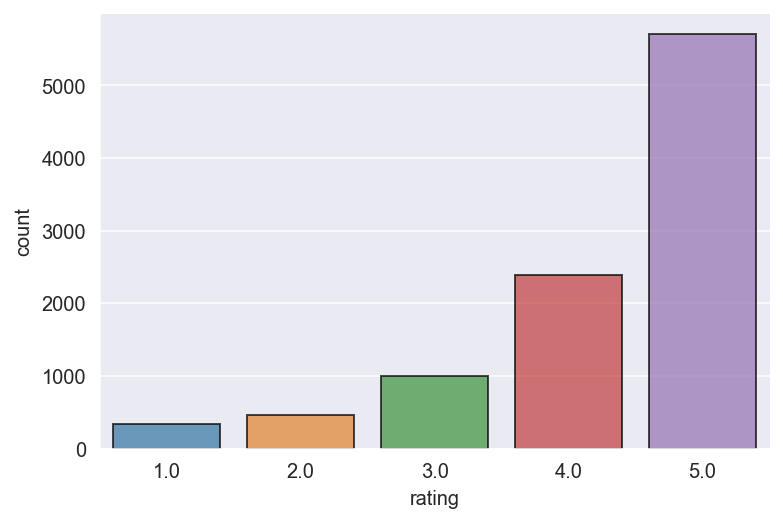

In [27]:
sns.countplot(x='rating',alpha=0.7,edgecolor="black", data=df)
sns.despine()
plt.title("{}".format())

plt.tight_layout()
plt.show()

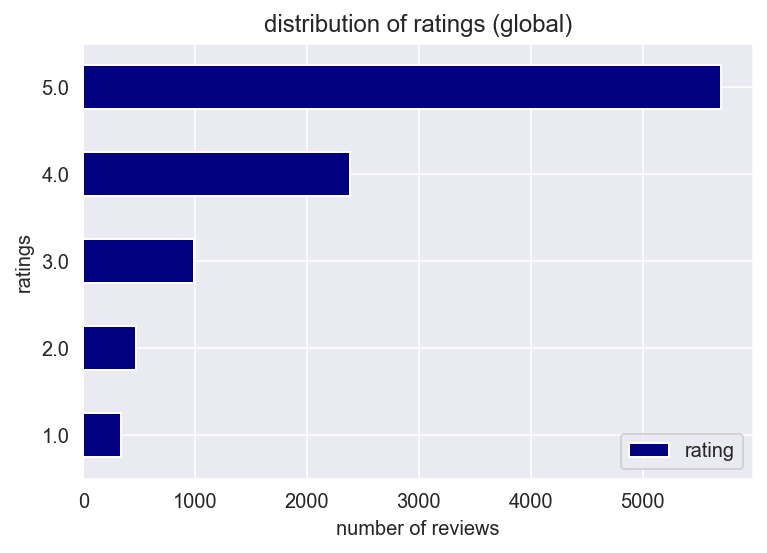

In [12]:


plt.title('distribution of ratings (global)')

ax = df['rating'].value_counts().sort_values().plot(kind = 'barh', color = 'navy')
ax.set_xlabel("number of reviews")
ax.set_ylabel("ratings")
ax.legend()

In [13]:
df_author = df.dropna()

In [14]:
df_author['author_info'].to_csv('author_info.csv')

In [15]:
df.head(2)

,title,author_info,rating,pros,cons
0,Great Place To Work,"May 3, 2021 - Partner Account Manager in Washi...",5.0,"Leader support, Transparency, Benefits, work/l...",I have not found any cons yet.
1,Opportunity for Growth,"May 3, 2021 - Business Development Representat...",5.0,-Quickly move up -Access to networking with pe...,"-Large company, there can be a decent amount o..."


In [16]:
df.isna().sum()

title            30
author_info    4757
rating            0
pros              0
cons              0
dtype: int64

In [17]:
info = df.dropna()

In [18]:
info

,title,author_info,rating,pros,cons
0,Great Place To Work,"May 3, 2021 - Partner Account Manager in Washi...",5.0,"Leader support, Transparency, Benefits, work/l...",I have not found any cons yet.
1,Opportunity for Growth,"May 3, 2021 - Business Development Representat...",5.0,-Quickly move up -Access to networking with pe...,"-Large company, there can be a decent amount o..."
2,Great place to work,"May 3, 2021 - Anonymous Employee",5.0,High income potential and upward mobility,"Pressure cooker, high expectations and stress ..."
3,Great culture and great opportunity for growth,"May 3, 2021 - BDR in San Francisco, CA",5.0,Excellent growth and networking opportunities,Not many cons I can think of
4,Fabulous Place to Work!,"May 3, 2021 - Customer Success Guide in Denver...",5.0,"Once you’re in, you’re given the freedom and f...",Still a “startup mentality”—so keep in mind al...
...,...,...,...,...,...
9882,Sales Development Representative,"May 18, 2021 - Sales Development Representative",4.0,- Great culture and benefits,- High volume and lots of pressure to hit your...
9883,Fantastic all around,"May 18, 2021 - Director",4.0,"Great team members and collaboration, excellen...",Lots of room to grow and mature as a company
9884,Is this becoming the Wild West?,"May 4, 2021 - Web Experience Manager",3.0,- PEOPL E: Talents pool and International Grow...,"After multiple reOrgs, acquisitions, and quara..."
9885,Good job,"May 18, 2021 - Account Executive in South San ...",3.0,"Good benefits, good solutions to sell",Low pay for stature of company


In [19]:
info['author_info_original'] = info['author_info'].copy()

/var/folders/4g/4qrhhk3j3kv_nf1xv032ysbw0000gn/T/ipykernel_9069/1355169737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info['author_info_original'] = info['author_info'].copy()


In [20]:
info['author_info'] = info['author_info'].str.lower()

/var/folders/4g/4qrhhk3j3kv_nf1xv032ysbw0000gn/T/ipykernel_9069/1906345256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info['author_info'] = info['author_info'].str.lower()


In [21]:
info.loc[info['author_info'].str.contains(r'anonymous'), 'author_info']= 'anonymous'

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [22]:
info.isna().sum()

title                   0
author_info             0
rating                  0
pros                    0
cons                    0
author_info_original    0
dtype: int64

In [23]:
info.loc[info['author_info'].str.contains(r'project manager'), 'author_info']= 'project manager'
info.loc[info['author_info'].str.contains(r'solution engineer'), 'author_info']= 'solution engineer'
info.loc[info['author_info'].str.contains(r'bdr|bd|business development'), 'author_info']= 'business development'

info.loc[info['author_info'].str.contains(r'customer success'), 'author_info']= 'customer success'
info.loc[info['author_info'].str.contains(r'software engineer'), 'author_info']= 'software engineer'
info.loc[info['author_info'].str.contains(r'finance'), 'author_info']= 'finance'
info.loc[info['author_info'].str.contains(r'systems engineer'), 'author_info']= 'systems engineer'
info.loc[info['author_info'].str.contains(r'recruitment|recruiter'), 'author_info']= 'recruiter'
info.loc[info['author_info'].str.contains(r'business analyst|analyst'), 'author_info']= 'business analyst'
info.loc[info['author_info'].str.contains(r'infrastructure'), 'author_info']= 'infrastructure'
info.loc[info['author_info'].str.contains(r'account director'), 'author_info']= 'account director'
info.loc[info['author_info'].str.contains(r'vice president'), 'author_info']= 'vice president'
info.loc[info['author_info'].str.contains(r'account executive'), 'author_info']= 'account executive'
info.loc[info['author_info'].str.contains(r'sales|sdr'), 'author_info']= 'sales'
info.loc[info['author_info'].str.contains(r'engineer'), 'author_info']= 'other engineer'
info.loc[info['author_info'].str.contains(r'systems specialist'), 'author_info']= 'systems specialist'
info.loc[info['author_info'].str.contains(r'business'), 'author_info']= 'business related'
info.loc[info['author_info'].str.contains(r'marketing'), 'author_info']= 'marketing'
info.loc[info['author_info'].str.contains(r'technical'), 'author_info']= 'technical stuff'
info.loc[info['author_info'].str.contains(r'other manager'), 'author_info']= 'other manager'

# info.loc[info['author_info'].str.contains(r''), 'author_info']= ''
# info.loc[info['author_info'].str.contains(r''), 'author_info']= ''
# info.loc[info['author_info'].str.contains(r''), 'author_info']= ''
# info.loc[info['author_info'].str.contains(r''), 'author_info']= ''
# info.loc[info['author_info'].str.contains(r''), 'author_info']= ''

In [24]:
info.loc[~info['author_info'].str.contains(
    r'anonymous|account executive|project manager|other manager|solution engineer|customer success|software engineer|finance|systems engineer|recruiter|business analyst|infrastructure|account director|vice president|business development|account executive|sales|other engineer|systems specialist|business related|marketing|technical stuff'), 'author_info']= 'others'

In [25]:
info['author_info'].value_counts()

others                1357
anonymous              874
account executive      732
other engineer         677
business related       435
sales                  397
technical stuff        275
marketing               90
vice president          81
customer success        74
recruiter               39
project manager         29
account director        25
systems specialist       9
finance                  9
infrastructure           6
Name: author_info, dtype: int64

In [26]:
info['author_info'].to_csv('authoer_info')

IndexError: Replacement index 0 out of range for positional args tuple

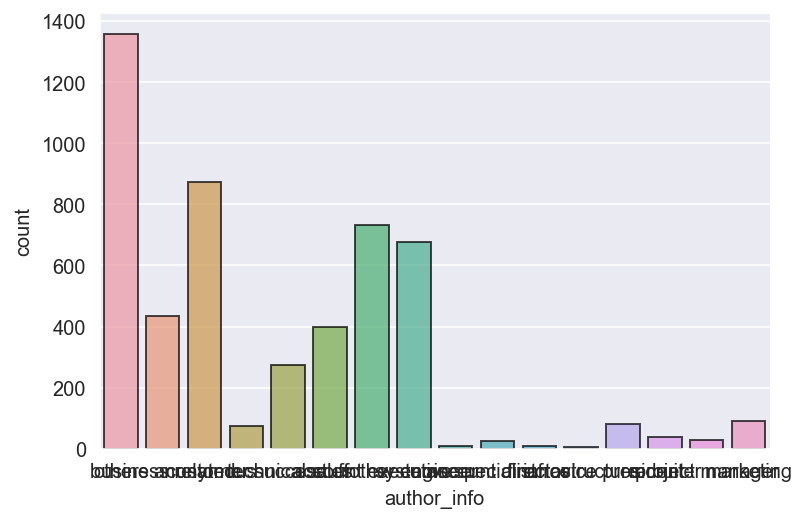

In [30]:
sns.countplot(x='author_info',alpha=0.7,edgecolor="black", data=info)
sns.despine()
plt.title("{}".format())

plt.tight_layout()
plt.show()

In [ ]:
info[info['author_info'] != 'account director' or 'marketing']

In [33]:
info = info.loc[:, 'author_info': 'rating']

In [34]:
df_dum = pd.get_dummies(info, columns = ['author_info'])

In [44]:
bins = [0, 3, 5]
names = ['low', 'high']
df_dum['eval'] = pd.cut(df_dum['rating'], bins, labels=names)
df_dum.drop(columns = ['rating'], inplace = True)

In [48]:
df_dum.columns

Index(['author_info_account director', 'author_info_account executive',
       'author_info_anonymous', 'author_info_business related',
       'author_info_customer success', 'author_info_finance',
       'author_info_infrastructure', 'author_info_marketing',
       'author_info_other engineer', 'author_info_others',
       'author_info_project manager', 'author_info_recruiter',
       'author_info_sales', 'author_info_systems specialist',
       'author_info_technical stuff', 'author_info_vice president', 'eval'],
      dtype='object')

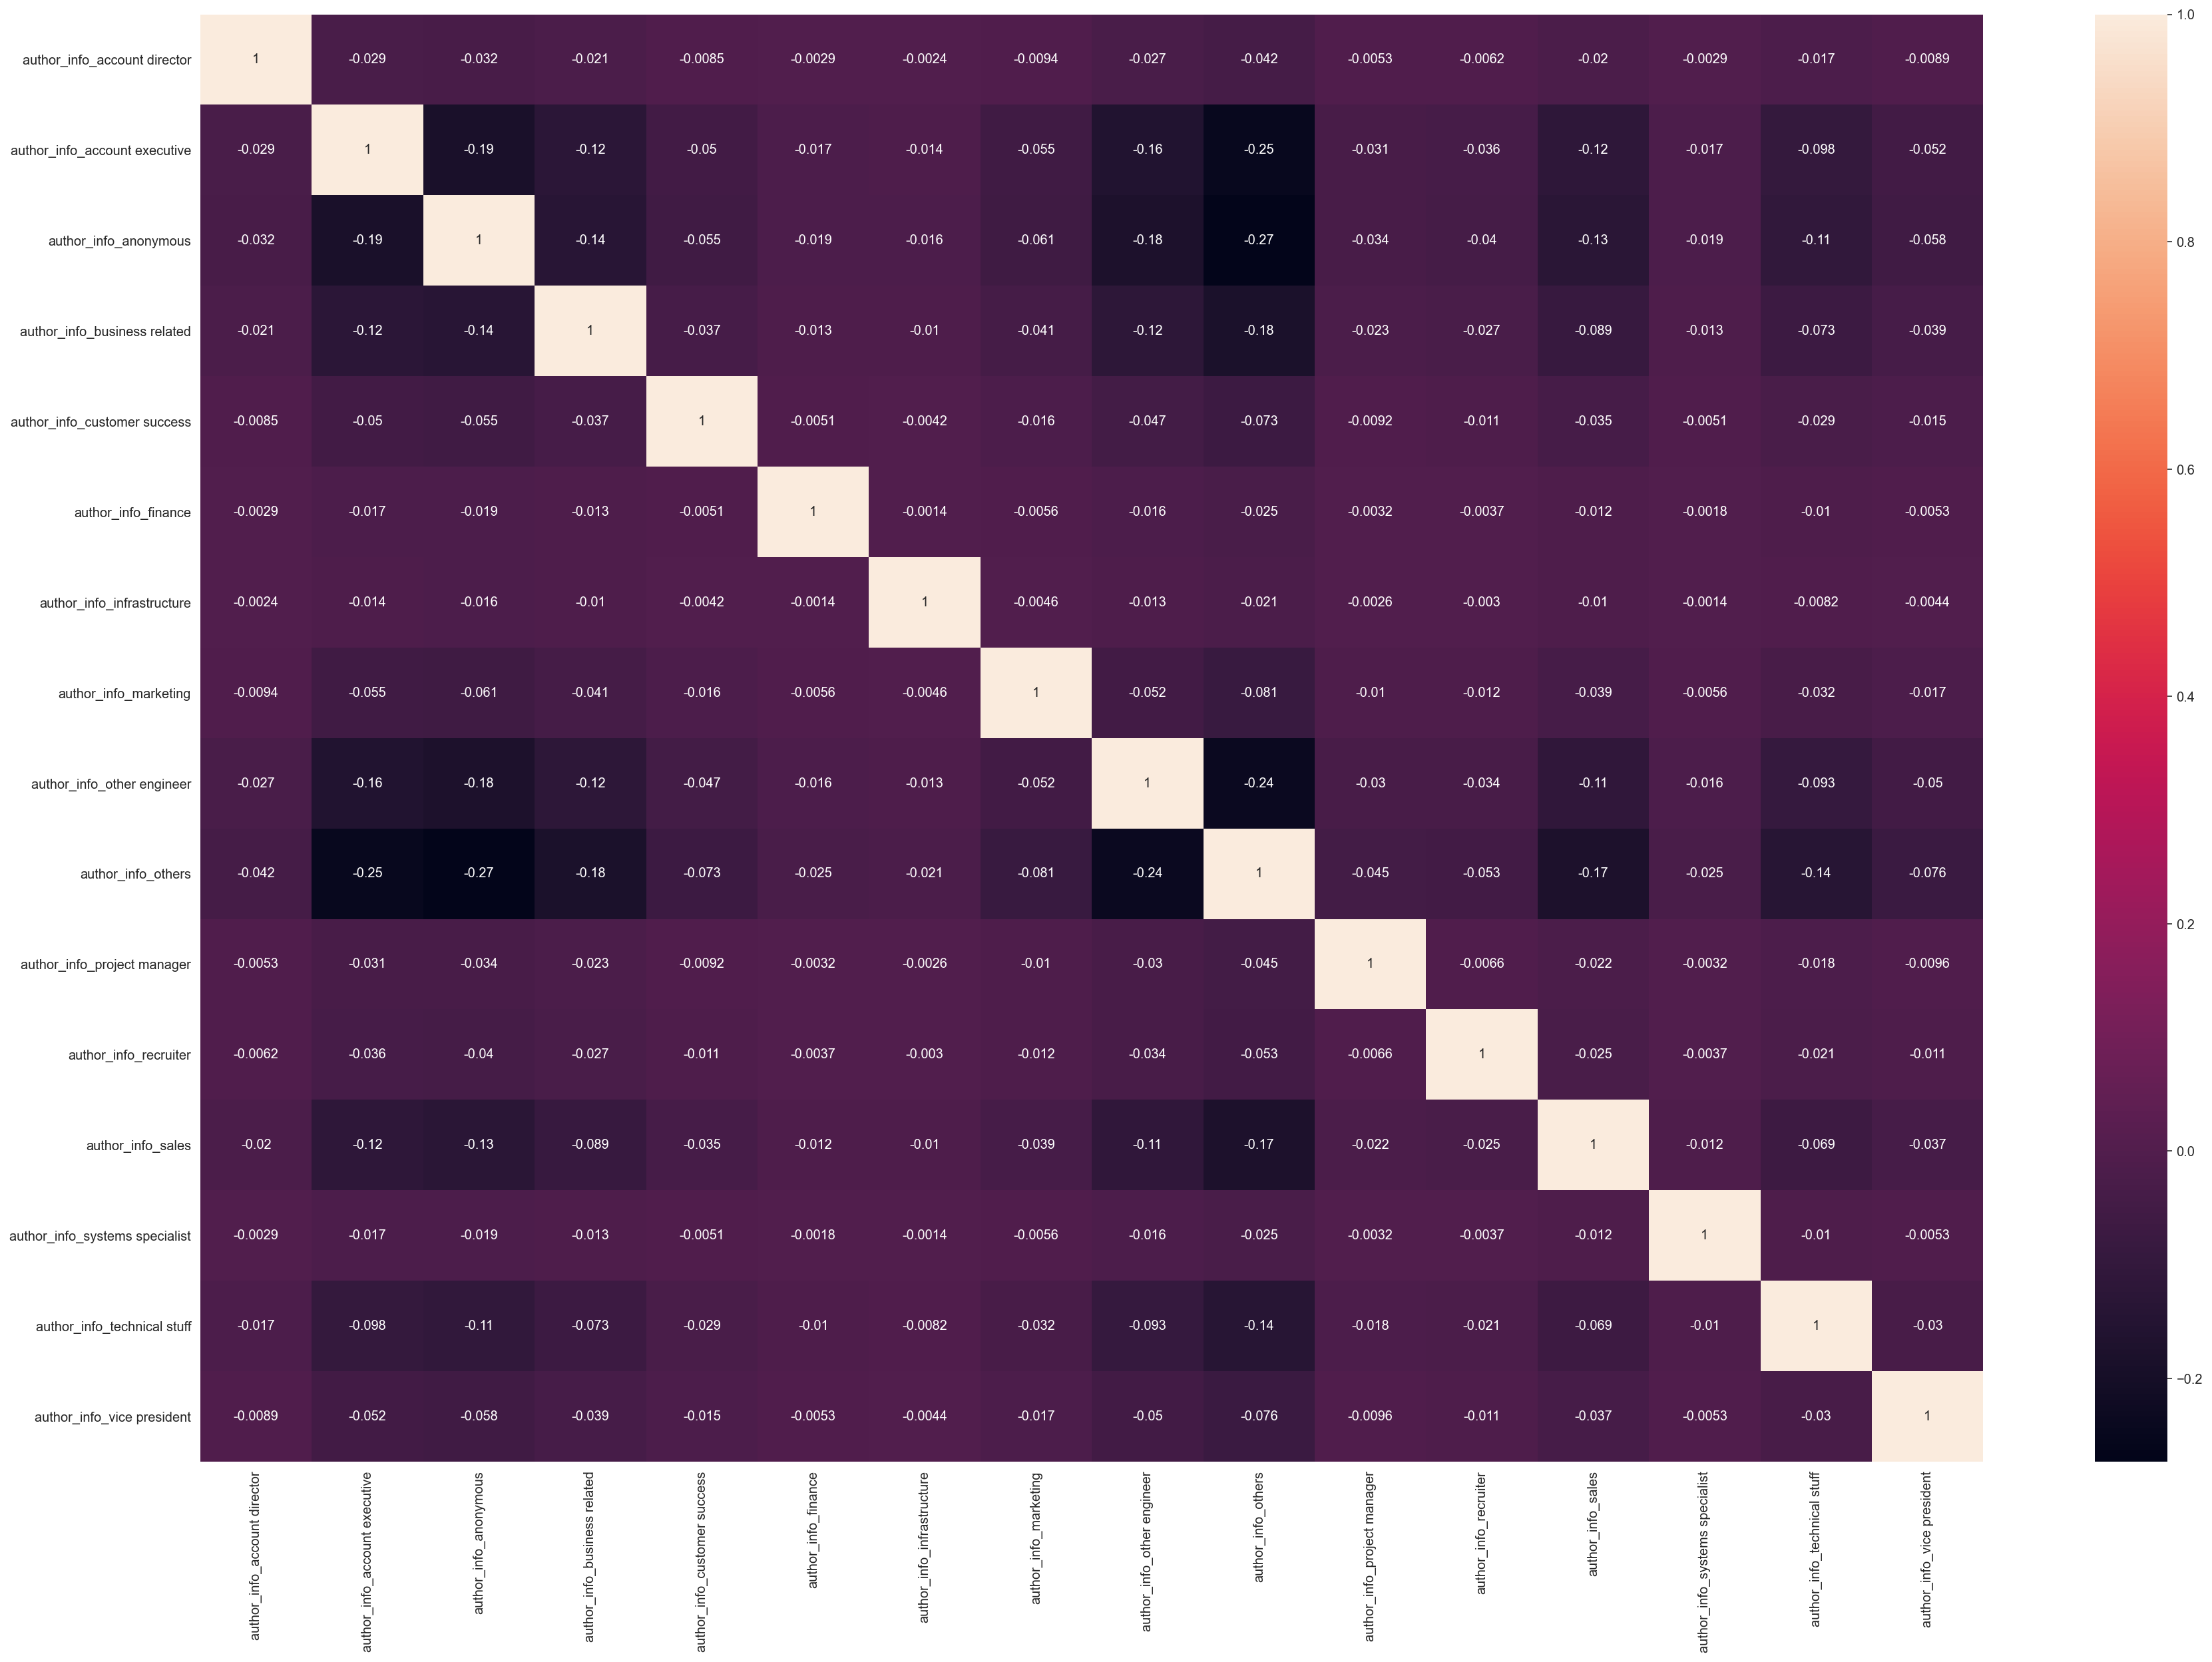

In [47]:
plt.figure(figsize=(30, 20))
# plt.yticks(rotation=0)
sns.heatmap(df_dum.corr(), annot=True)
plt.show()